In [1]:
import pandas as pd
import src.text_analysis as ta
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
amz_rev = pd.read_csv('output/amz_rev_final.csv')
rename = {0:'Real',1:'Spam'}
amz_rev['low_quality'] = amz_rev['low_quality'].replace(rename)

In [3]:
amz_rev.head()

,Unnamed: 0,reviewText,polarity,subjectivity,num_words,flesch_score,verbs_ratio,nouns_ratio,prp_ratio,low_quality,grammar
0,0,Excellent,1.00,1.00,1,-47.99,0.00,1.00,0.00,Spam,0
1,1,Great,0.80,0.75,1,121.22,0.00,1.00,0.00,Spam,0
2,2,exactly what i wanted,0.25,0.25,4,50.50,0.25,0.25,0.00,Spam,2
3,3,very good,0.91,0.78,2,120.21,0.00,0.00,0.00,Spam,1
4,4,thank you very much,0.26,0.26,4,118.18,0.00,0.25,0.25,Spam,1


#### Checking if it is a balanced dataset

In [4]:
amz_rev.low_quality.value_counts()

Real    24590
Spam    20358
Name: low_quality, dtype: int64

In [5]:
tfidf=TfidfVectorizer(min_df=.02, max_df =0.08, tokenizer=ta.spacy_tokenizer)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(amz_rev['reviewText'], amz_rev['low_quality'], test_size=0.25, random_state=28, shuffle=True)

In [7]:
train = tfidf.fit_transform(X_train.values.astype('U'))
test = tfidf.transform(X_test.values.astype('U'))

#### Training several models at once

In [8]:
models = {
    "PassiveAggressiveClassifier" : PassiveAggressiveClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "SVC" : SVC()
}

In [9]:
for name, model in models.items():
    print(f"Training {name}")
    model.fit(train, y_train)
print("All the models have been trained")

Training PassiveAggressiveClassifier
Training GradientBoostingClassifier
Training AdaBoostClassifier
Training RandomForestClassifier
Training SVC
All the models have been trained


#### Testing

In [10]:
for name, model in models.items():
    y_pred = model.predict(test)
    print(f"-------{name}-------")
    print (f"Accuracy: {accuracy_score(y_test,y_pred)*100:.3}%")
    print(f"Precission: {precision_score(y_test,y_pred, average = 'weighted')*100:.3}%")
    print(f"Recall: {recall_score(y_test,y_pred, average = 'weighted')*100:.3}%")
    print(f"F1_score: {f1_score(y_test,y_pred, average = 'weighted')*100:.3}%")

-------PassiveAggressiveClassifier-------
Accuracy: 97.9%
Precission: 97.9%
Recall: 97.9%
F1_score: 97.9%
-------GradientBoostingClassifier-------
Accuracy: 95.6%
Precission: 95.8%
Recall: 95.6%
F1_score: 95.6%
-------AdaBoostClassifier-------
Accuracy: 95.7%
Precission: 95.7%
Recall: 95.7%
F1_score: 95.7%
-------RandomForestClassifier-------
Accuracy: 98.3%
Precission: 98.3%
Recall: 98.3%
F1_score: 98.3%
-------SVC-------
Accuracy: 97.9%
Precission: 97.9%
Recall: 97.9%
F1_score: 97.9%


In [11]:
confusion_matrix(y_test,y_pred, labels = ['Real','Spam'])

array([[6073,   38],
       [ 201, 4925]])

<AxesSubplot:>

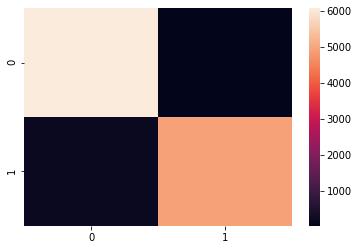

In [16]:
sns.heatmap(confusion_matrix(y_test,y_pred, labels = ['Real','Spam']))

#### K-fold cross validation

In [13]:
X = tfidf.fit_transform(amz_rev['reviewText'].values.astype('U'))

In [14]:
for name, model in models.items():
    print(f"{name}")
    validation = cross_val_score(model, X, amz_rev['low_quality'].values, cv=5)
    print(f'K-fold cross validation Accuracy: {round(validation.mean() * 100,2)}%')

PassiveAggressiveClassifier
K-fold cross validation Accuracy: 97.83%
GradientBoostingClassifier
K-fold cross validation Accuracy: 95.56%
AdaBoostClassifier
K-fold cross validation Accuracy: 95.89%
RandomForestClassifier
K-fold cross validation Accuracy: 98.14%
SVC
K-fold cross validation Accuracy: 98.02%


#### After applying a k-fold cross validation I decided to select Support Vector Classification (SVC).

In [15]:
model = SVC()
model.fit(X, amz_rev['low_quality'].values)

SVC()